The following line stops the cursor from blinking

In [1]:
%%javascript
var rate = 0;
// apply setting to  all current CodeMirror instances
IPython.notebook.get_cells().map(
    function(c) {  return c.code_mirror.options.cursorBlinkRate=rate;  }
);

// make sure new CodeMirror instance also use this setting
CodeMirror.defaults.cursorBlinkRate=rate;

<IPython.core.display.Javascript object>

Import needed libraries

In [2]:
import mapper
#from mapper import cmappertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import *

%matplotlib inline

Using cmappertools v1.0.24.


<b>Step 1: Input data</b><br>
    Load the circle data set, circle = $x^2 + y^2 = 1$

In [3]:
### Uncomment below to read in data via file in Desktop folder
# filename = 'Desktop/datafile.txt'
# data = np.loadtxt(str(filename), delimiter=',', dtype=np.float)

### Load circle data set 
data = mapper.shapes.circle(samples=80)
#data.shape
#data[:,0]

Run the following without modification, just preprocessing some variables

In [4]:
# Preprocessing
point_labels = None
mask = None
Gauss_density = mapper.filters.Gauss_density
kNN_distance  = mapper.filters.kNN_distance
crop = mapper.crop
data, point_labels = mapper.mask_data(data, mask, point_labels)


<b>Step 2: Choose metric </b><br>
Below we are choosing to use the Euclidean metric

In [5]:
intrinsic_metric = False
if intrinsic_metric:
    is_vector_data = data.ndim != 1
    if is_vector_data:
        metric = Euclidean            # here we choose Euclidean metric
        if metric != 'Euclidean':
            raise ValueError('Not implemented')
    data = mapper.metric.intrinsic_metric(data, k=1, eps=1.0)
is_vector_data = data.ndim != 1


<b>Step 3: Choose Filter function</b><br>
Below we are choosing to use projection to first principal component

In [6]:
if is_vector_data:
    metricpar = {'metric': 'euclidean'}
    f = mapper.filters.dm_eigenvector(data,
        metricpar=metricpar,
        k=0, mean_center=True)
else:
    f = mapper.filters.dm_eigenvector(data,
        k=0, mean_center=True)
    
### Uncomment out the following to change filter function
### to Gauss density
#if is_vector_data:
#    metricpar = {'metric': 'euclidean'}
#    f = mapper.filters.Gauss_density(data,
#        metricpar=metricpar,
#        sigma=1.0)
#else:
#    f = mapper.filters.Gauss_density(data,
#        sigma=1.0)

# Filter transformation
mask = None
crop = mapper.crop

Eigenvalues:
[-36.9533893]


<b>Step 4: Select more Mapper parameters</b>
Below we choose to use 15 intervals with 50% overlap

In [7]:
cover = mapper.cover.cube_cover_primitive(intervals=5, overlap=40.0)

Below we choose to use single linkage clustering

In [8]:
cluster = mapper.single_linkage()

Run the following without modification to run mapper algorithm

In [9]:
if not is_vector_data:
    metricpar = {}
mapper_output = mapper.mapper(data, f,
    cover=cover,
    cluster=cluster,
    point_labels=point_labels,
    cutoff=None,
    metricpar=metricpar)


Number of CPU cores present: 4
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Mapper: Filter range in dimension 0: [-0.15, 0.15]
Mapper: Cover: Hypercube cover. Intervals: (5,). Overlap: (40.0,)Filter level (0,) has 32 points.

Mapper: Clustering: Single linkage clusteringFilter level (1,) has 14 points.Filter level (2,) has 11 points.Filter level (3,) has 17 points.Filter level (4,) has 30 points.




Mapper: Cutoff: None
Level: (0,)
Level: (1,)
Level: (2,)
Level: (3,)
Level: (4,)


Choose where to cut the dendrogram in order to create clusters

In [10]:
cutoff = mapper.cutoff.first_gap(gap=0.1)
mapper_output.cutoff(cutoff, f, cover=cover, simple=False)

### Uncomment out the following to change how the dendrogram is cut
### in order to determine clusters.
#mapper.scale_graph(mapper_output, f, cover=cover,
#    weighting='inverse', maxcluster=50, expand_intervals=False, exponent=1.0,
#    simple=False)

# mapper_output.draw_scale_graph()
# plt.savefig('scale_graph.pdf')
# plt.show()

Scale graph path: [1 3 2 2 1]
There are 9 nodes.
Generate the simplicial complex.
Collect simplices of dimension 1:
There are 7 simplices of dimension 1.
Collect simplices of dimension 2:
There are 0 simplices of dimension 2.
Dimension: 1


<b>Step 5: Choose display parameters</b><br>
Choose how to color the vertices (nodes) in mapper output

In [11]:
nodes = mapper_output.nodes #list of node objects; variables
                            #of node are level, points, attribute
node_color = None
#node_color = [1,2,3,4,5,6,7,8]
point_color = data[:,0]       # coloring nodes in mapper output using average of first coordinate
name = 'custom scheme'
node_color = mapper_output.postprocess_node_color(node_color, point_color, point_labels)


<b>Step 6:  Output</b><br>
Draw TDA mapper graph

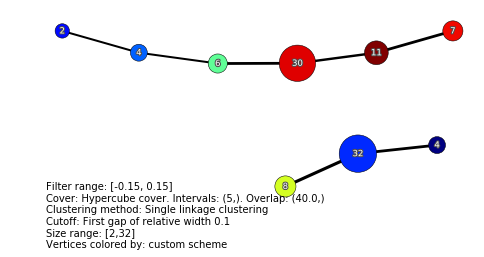

In [12]:
minsizes = []
mapper_output.draw_2D(minsizes=minsizes,
    node_color=node_color,
    node_color_scheme=name)
plt.savefig('mapper_output.pdf')
plt.show()

<b>Step 7:  Graphing clusters in a given bin</b><br>
Choose a value less than or equal to intervals for bin; i.e. bin = n where n <= intervals.



Run the following code


bin 1
[ 6 22]
bin 1
[34 35 50 60]
bin 1
[ 9 10 19 32 43 49 58 78]


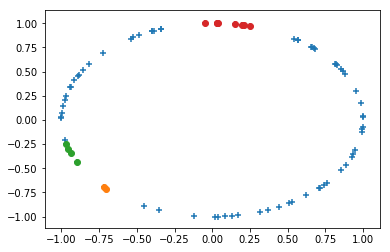

In [13]:
levelSets = mapper_output.levelsets
bins = set()  #a set of numbers corsponding to bins
for i in levelSets:
    bins.add(i[0])
bin = 1 ##### CHANGE THIS TO COLOR DIFFERENT BINS ##### 
fig, ax = plt.subplots()  #create a plt object to graph our data
ax.scatter(data[:,0],data[:,1], marker='+') #graphing the entire data points with marker '+'

for i in nodes:
    if i.level[0] == bin:
        print 'bin', i.level[0]  #printing bin index
        print i.points   #printing the indecis of data points in the bin
        #print data[i.points]
        ax.scatter(data[i.points][:,0], data[i.points][:,1]) #graphing the points in the chosen bin 
                                                    #using different colors
